<a href="https://colab.research.google.com/github/blooming-daisy/bigdata_edu/blob/master/fintech/%EB%84%A4%EC%9D%B4%EB%B2%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%9E%A9%EC%97%90%EC%84%9C_%EA%B2%80%EC%83%89%EC%96%B4_%ED%8A%B8%EB%A0%8C%EB%93%9C_%EB%B6%84%EC%84%9D%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 네이버 데이터랩에서 검색어 트렌드 분석하기
- 검색어 트렌드를 시각화하여, 해당 단어의 검색 추이를 살펴본다.

## 1. 사전작업

In [1]:
# 시각화를 위한 폰트설정
import platform
import matplotlib.pyplot as plt

system_name = platform.system()

if system_name == "Darwin" :
    font_family = "AppleGothic"
elif system_name == "Windows":
    font_family = "Malgun Gothic"
else:
    # Linux(Colab)
    !apt-get -qq -y install fonts-nanum > /dev/null
    import matplotlib.font_manager as fm

    fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    font = fm.FontProperties(fname=fontpath, size=9)
    fm._rebuild()
    font_family = "NanumBarunGothic"
    
# 그래프 스타일 설정
plt.style.use("ggplot")

# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)


# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

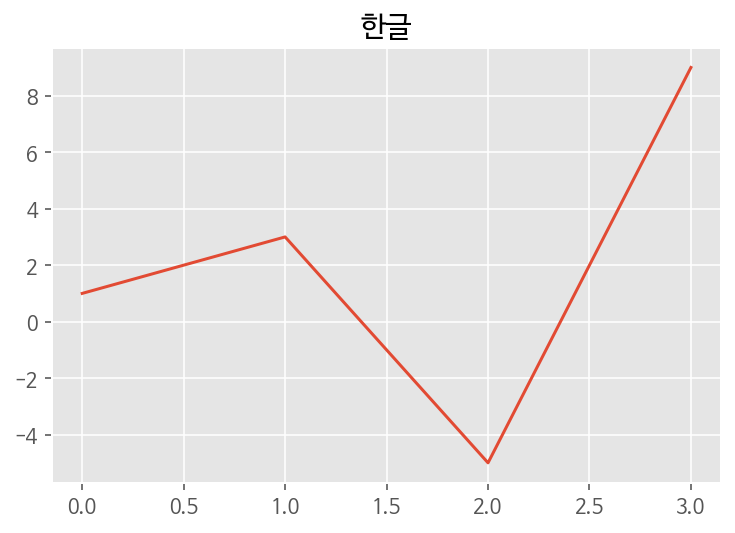

In [3]:
import pandas as pd
pd.Series([1,3,-5, 9]).plot(title = '한글')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.gridspec as gridspec

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

## 2. 작업하기

### 1) Naver Developer에서 제공하는 *'통합 검색어 트렌드 API'* 가지고 오기
- 통합 검색어 트렌드 API 구현 예제에서 코드를 가지고 온다.

In [5]:
nid = ###
nkey = ###

In [6]:
#-*- coding: utf-8 -*-

import json

import os
import sys
import urllib.request

client_id = nid
client_secret = nkey

url = "https://openapi.naver.com/v1/datalab/search";

# body 안에는 모두 큰 따옴표 사용을 해주어야 한다!
body = """{
  "startDate":"2021-01-01",
  "endDate":"2022-04-19",
  "timeUnit":"week",
  "keywordGroups":[
    {"groupName":"그로스해킹","keywords":["그로스해킹","그로스 해킹"]}, 
    {"groupName":"growth hacking","keywords":["growth hacking"]}
    ]
    }
    """


request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")
response = urllib.request.urlopen(request, data=body.encode("utf-8"))
rescode = response.getcode()


if(rescode==200):
    response_body = response.read()
    res = response_body.decode('utf-8')
    print(res)
    
else:
    print("Error Code:" + rescode)

{"startDate":"2020-12-28","endDate":"2022-04-20","timeUnit":"week","results":[{"title":"그로스해킹","keywords":["그로스해킹","그로스 해킹"],"data":[{"period":"2020-12-28","ratio":70.86092},{"period":"2021-01-04","ratio":95.17502},{"period":"2021-01-11","ratio":73.03689},{"period":"2021-01-18","ratio":75.87511},{"period":"2021-01-25","ratio":73.50993},{"period":"2021-02-01","ratio":82.30842},{"period":"2021-02-08","ratio":65.75212},{"period":"2021-02-15","ratio":71.33396},{"period":"2021-02-22","ratio":77.29422},{"period":"2021-03-01","ratio":77.76726},{"period":"2021-03-08","ratio":87.51182},{"period":"2021-03-15","ratio":100},{"period":"2021-03-22","ratio":86.84957},{"period":"2021-03-29","ratio":91.39072},{"period":"2021-04-05","ratio":92.52601},{"period":"2021-04-12","ratio":79.18637},{"period":"2021-04-19","ratio":67.45506},{"period":"2021-04-26","ratio":81.83538},{"period":"2021-05-03","ratio":80.32166},{"period":"2021-05-10","ratio":91.95837},{"period":"2021-05-17","ratio":81.07852},{"period":"

- ratio?
  - 구간별 검색량의 상대적 비율. 구간별 결과에서 가장 큰 값을 100으로 설정한 상댓값이다.

### 2) 출력된 '통합 검색어 트렌드 API' 값 수정하기
#### (1) Json 데이터 분해

In [7]:
jdata = json.loads(res)
print(jdata)

{'startDate': '2020-12-28', 'endDate': '2022-04-20', 'timeUnit': 'week', 'results': [{'title': '그로스해킹', 'keywords': ['그로스해킹', '그로스 해킹'], 'data': [{'period': '2020-12-28', 'ratio': 70.86092}, {'period': '2021-01-04', 'ratio': 95.17502}, {'period': '2021-01-11', 'ratio': 73.03689}, {'period': '2021-01-18', 'ratio': 75.87511}, {'period': '2021-01-25', 'ratio': 73.50993}, {'period': '2021-02-01', 'ratio': 82.30842}, {'period': '2021-02-08', 'ratio': 65.75212}, {'period': '2021-02-15', 'ratio': 71.33396}, {'period': '2021-02-22', 'ratio': 77.29422}, {'period': '2021-03-01', 'ratio': 77.76726}, {'period': '2021-03-08', 'ratio': 87.51182}, {'period': '2021-03-15', 'ratio': 100}, {'period': '2021-03-22', 'ratio': 86.84957}, {'period': '2021-03-29', 'ratio': 91.39072}, {'period': '2021-04-05', 'ratio': 92.52601}, {'period': '2021-04-12', 'ratio': 79.18637}, {'period': '2021-04-19', 'ratio': 67.45506}, {'period': '2021-04-26', 'ratio': 81.83538}, {'period': '2021-05-03', 'ratio': 80.32166}, {'pe

In [25]:
jdata['results']

[{'data': [{'period': '2020-12-28', 'ratio': 70.86092},
   {'period': '2021-01-04', 'ratio': 95.17502},
   {'period': '2021-01-11', 'ratio': 73.03689},
   {'period': '2021-01-18', 'ratio': 75.87511},
   {'period': '2021-01-25', 'ratio': 73.50993},
   {'period': '2021-02-01', 'ratio': 82.30842},
   {'period': '2021-02-08', 'ratio': 65.75212},
   {'period': '2021-02-15', 'ratio': 71.33396},
   {'period': '2021-02-22', 'ratio': 77.29422},
   {'period': '2021-03-01', 'ratio': 77.76726},
   {'period': '2021-03-08', 'ratio': 87.51182},
   {'period': '2021-03-15', 'ratio': 100},
   {'period': '2021-03-22', 'ratio': 86.84957},
   {'period': '2021-03-29', 'ratio': 91.39072},
   {'period': '2021-04-05', 'ratio': 92.52601},
   {'period': '2021-04-12', 'ratio': 79.18637},
   {'period': '2021-04-19', 'ratio': 67.45506},
   {'period': '2021-04-26', 'ratio': 81.83538},
   {'period': '2021-05-03', 'ratio': 80.32166},
   {'period': '2021-05-10', 'ratio': 91.95837},
   {'period': '2021-05-17', 'ratio': 

In [27]:
#'그로스 해킹'에 대한 결과

jdata['results'][0]

{'data': [{'period': '2020-12-28', 'ratio': 70.86092},
  {'period': '2021-01-04', 'ratio': 95.17502},
  {'period': '2021-01-11', 'ratio': 73.03689},
  {'period': '2021-01-18', 'ratio': 75.87511},
  {'period': '2021-01-25', 'ratio': 73.50993},
  {'period': '2021-02-01', 'ratio': 82.30842},
  {'period': '2021-02-08', 'ratio': 65.75212},
  {'period': '2021-02-15', 'ratio': 71.33396},
  {'period': '2021-02-22', 'ratio': 77.29422},
  {'period': '2021-03-01', 'ratio': 77.76726},
  {'period': '2021-03-08', 'ratio': 87.51182},
  {'period': '2021-03-15', 'ratio': 100},
  {'period': '2021-03-22', 'ratio': 86.84957},
  {'period': '2021-03-29', 'ratio': 91.39072},
  {'period': '2021-04-05', 'ratio': 92.52601},
  {'period': '2021-04-12', 'ratio': 79.18637},
  {'period': '2021-04-19', 'ratio': 67.45506},
  {'period': '2021-04-26', 'ratio': 81.83538},
  {'period': '2021-05-03', 'ratio': 80.32166},
  {'period': '2021-05-10', 'ratio': 91.95837},
  {'period': '2021-05-17', 'ratio': 81.07852},
  {'period

In [10]:
# 'growth hacking'에 대한 결과

jdata['results'][1]

{'data': [{'period': '2021-01-04', 'ratio': 2.93282},
  {'period': '2021-01-11', 'ratio': 1.70293},
  {'period': '2021-01-18', 'ratio': 3.50047},
  {'period': '2021-01-25', 'ratio': 1.79754},
  {'period': '2021-02-01', 'ratio': 3.50047},
  {'period': '2021-02-08', 'ratio': 1.60832},
  {'period': '2021-02-15', 'ratio': 1.51371},
  {'period': '2021-02-22', 'ratio': 1.22989},
  {'period': '2021-03-08', 'ratio': 1.22989},
  {'period': '2021-03-15', 'ratio': 2.93282},
  {'period': '2021-03-22', 'ratio': 3.9735},
  {'period': '2021-03-29', 'ratio': 1.98675},
  {'period': '2021-04-05', 'ratio': 3.12204},
  {'period': '2021-04-12', 'ratio': 5.67644},
  {'period': '2021-04-19', 'ratio': 1.89214},
  {'period': '2021-04-26', 'ratio': 1.79754},
  {'period': '2021-05-03', 'ratio': 2.55439},
  {'period': '2021-05-10', 'ratio': 1.3245},
  {'period': '2021-05-17', 'ratio': 0.94607},
  {'period': '2021-05-24', 'ratio': 4.44654},
  {'period': '2021-05-31', 'ratio': 1.41911},
  {'period': '2021-06-07', '

       period     ratio
0  2020-12-28  70.86092
1  2021-01-04  95.17502
2  2021-01-11  73.03689
3  2021-01-18  75.87511
4  2021-01-25  73.50993




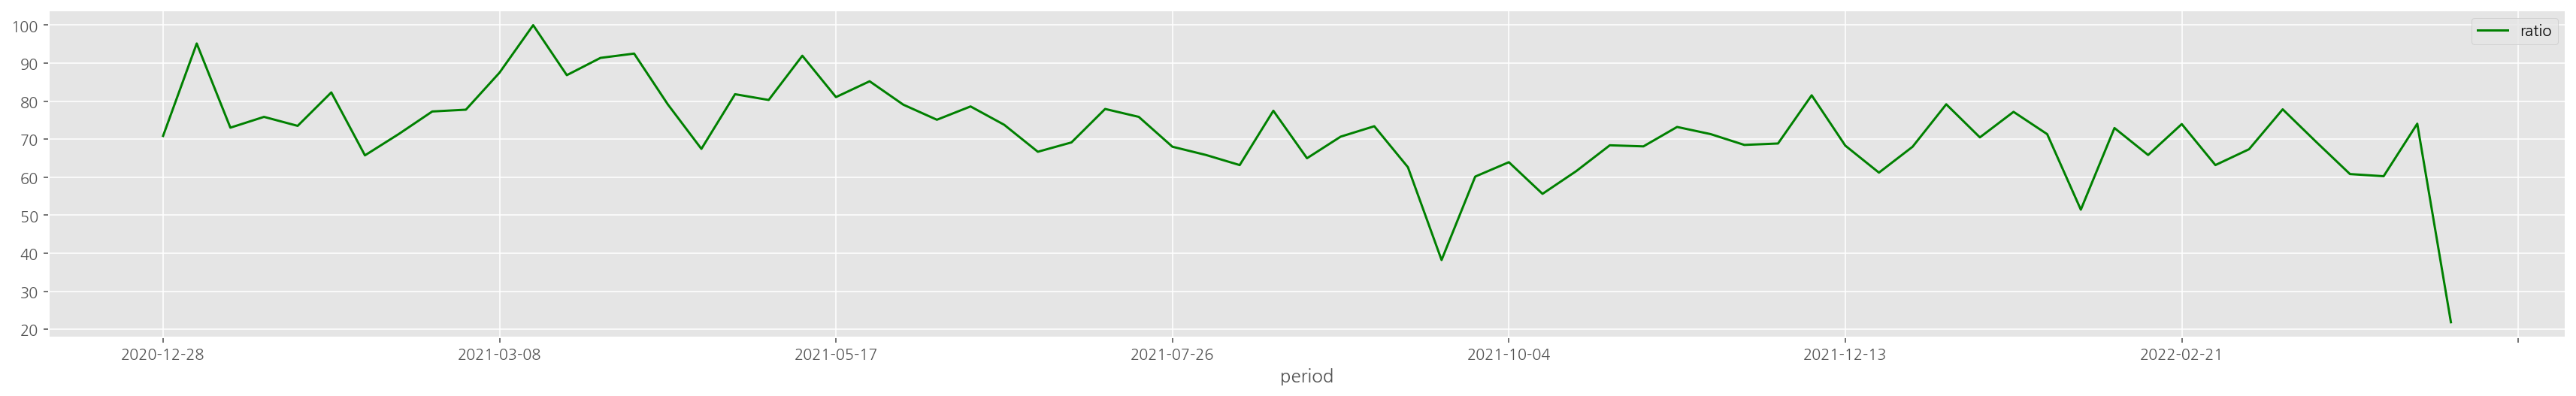

In [11]:
# 시각화 해보기

pdata = jdata['results'][0]['data']
kor_data = pd.DataFrame.from_dict(pdata)
print(kor_data.head())
print('\n')

#period와 ratio 시각화하기
kor_data.plot(kind = 'line', x = 'period', y = 'ratio', color = 'Green', figsize = (30,4), subplots = True)
plt.legend()
plt.show()

### 3) 검색어 트렌드 함수화하기

#### (1) make_query 함수 만들기

In [12]:
#-*- coding: utf-8 -*-

def make_query(keywords = [], start_date = '', end_date = '', time_unit = ''):

  # 먼저, 단어 구성을 꾸려준다.
  res = []
  for words in keywords:
    dict = {'groupName': words[0], 'keywords':words}
    res.append(dict)

  rdict = {"startDate":start_date,  "endDate":end_date,  "timeUnit":time_unit, "keywordGroups":res}

  return json.dumps(rdict, ensure_ascii = False)

  #json.dumps : 


# 원래 API가 구성된 모습

# body = """{
#   "startDate":"2021-01-01",
#   "endDate":"2022-04-19",
#   "timeUnit":"week",
#   "keywordGroups":[
#     {"groupName":"그로스해킹","keywords":["그로스해킹","그로스 해킹"]}, 
#     {"groupName":"growth hacking","keywords":["growth hacking"]}
#     ]
#     }
#     """

In [13]:
# 함수 test

keywords = [['기획자','서비스기획','PM','서비스기획자'], ['개발자','게임개발자','어플개발자','앱개발자']]

make_query(keywords, '2020-01-01','2022-03-31', 'date')

'{"startDate": "2020-01-01", "endDate": "2022-03-31", "timeUnit": "date", "keywordGroups": [{"groupName": "기획자", "keywords": ["기획자", "서비스기획", "PM", "서비스기획자"]}, {"groupName": "개발자", "keywords": ["개발자", "게임개발자", "어플개발자", "앱개발자"]}]}'

- 잘 출력이 되었음을 확인했다!

#### (2) MyNsearch 함수 만들기
- 데이터랩에서 받아온 API 코드에, make_query 함수를 body 값으로 받게 만들어 주는 함수이다.
- 검색량을 출력하게 할 것이다.

In [14]:
def MySearch(keywords = [], start_date = '', end_date = '', time_unit = ''):
  client_id = nid
  client_secret = nkey

  url = "https://openapi.naver.com/v1/datalab/search";

  # body 안에는 모두 큰 따옴표 사용을 해주어야 한다!
  body = make_query(keywords, start_date, end_date, time_unit)


  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id",client_id)
  request.add_header("X-Naver-Client-Secret",client_secret)
  request.add_header("Content-Type","application/json")
  response = urllib.request.urlopen(request, data=body.encode("utf-8"))
  rescode = response.getcode()


  if(rescode==200):
      response_body = response.read()
      res = response_body.decode('utf-8')
      
      
  else:
      print("Error Code:" + rescode)

  return res

#### (3) MyDataLab 함수 만들기
- 위에서 키워드로 나온 데이터를 DataFrame 형태로 만들어준다.

In [15]:
def MyDataLab(keywords = [], start_date = '', end_date = '', time_unit = ''):
  res = MySearch(keywords, start_date, end_date, time_unit)

  jdata = json.loads(res)

  i = 0;

  #base DataFrame 만들어주기
  main_df = pd.DataFrame()

  #키워드별로 컬럼 지정
  for words in keywords:
    pdata = jdata['results'][i]['data']
    # jdata는 {'startDate': '2020-12-28', 'endDate': '2022-04-20', 'timeUnit': 'week', 'results': [{'title': '그로스해킹', 'keywords': ['그로스해킹', '그로스 해킹'], 'data': [{'period': '2020-12-28', 'ratio': 70.86092}}로 구성이 되어있음.

    df = pd.DataFrame.from_dict(pdata)
    df.columns = ['period', words[0].strip()]
    df1 = df.set_index('period')

    main_df = pd.merge(main_df, df1, how = 'outer', left_index = True, right_index = True)
    i+= 1

  return main_df

In [16]:
MyDataLab(keywords, '2020-01-01', '2022-03-31', 'week')

,기획자,개발자
period,,
2019-12-30,58.58208,17.61586
2020-01-06,72.28004,20.65985
2020-01-13,67.51767,17.86135
2020-01-20,58.72937,16.12333
2020-01-27,69.21641,20.98389
...,...,...
2022-02-28,84.71131,42.63550
2022-03-07,81.13707,34.27926
2022-03-14,97.83974,39.74862


### 4) 생성한 함수로 검색어 트렌드 분석해보기

In [17]:
keywords = [['기획자','서비스기획','PM','서비스기획자'], ['개발자','게임개발자','어플개발자','앱개발자']]

df_main = MyDataLab(keywords, '2020-01-01', '2022-03-31', 'month')
df_main.head()

,기획자,개발자
period,,
2020-01-01,73.38161,20.60723
2020-02-01,72.08249,22.59137
2020-03-01,86.45349,24.44096
2020-04-01,88.48167,27.33767
2020-05-01,86.01800,26.39819


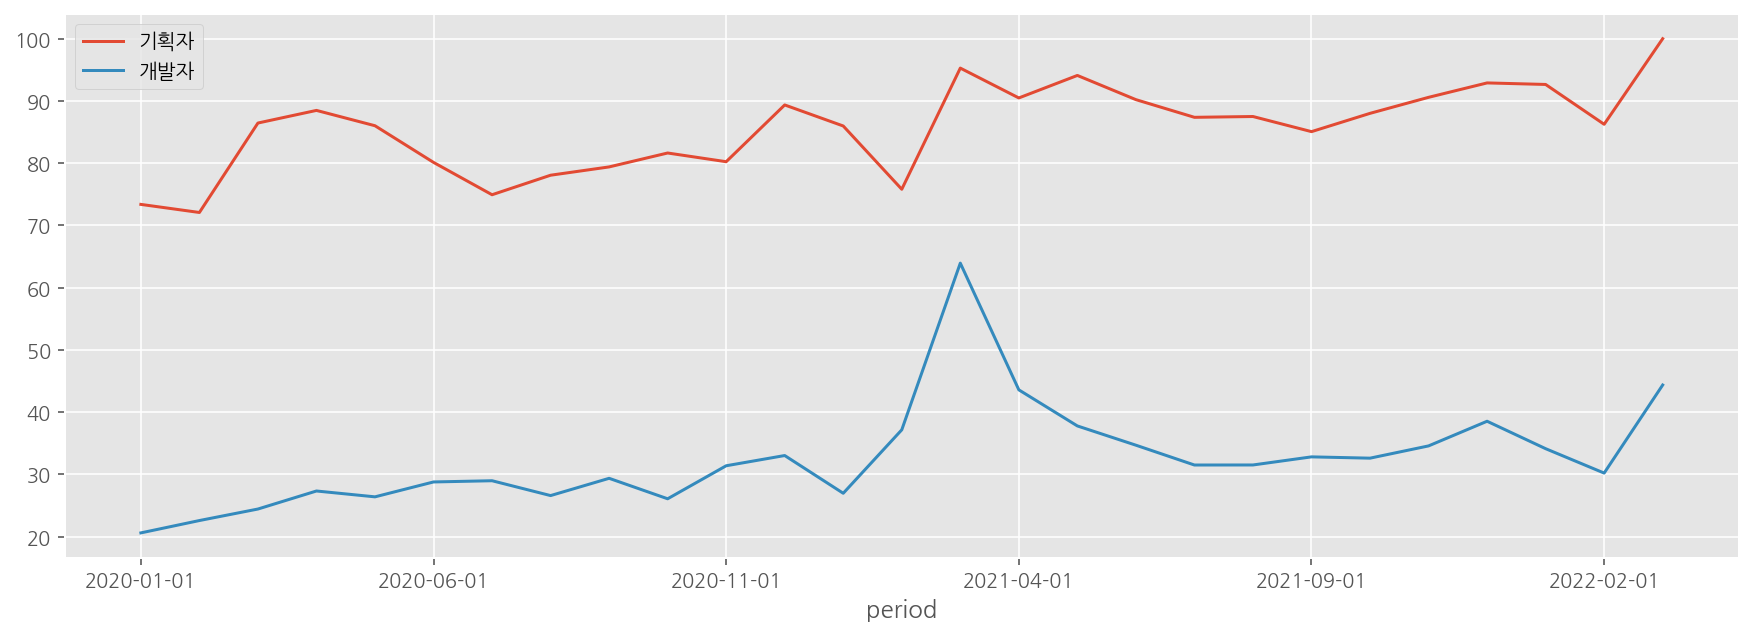

In [19]:
df_main.plot(figsize = (15,5))
plt.show()

### 5) 그로스 해킹에 대한 표 다시 그려보기

               그로스해킹  growth hacking
period                              
2017-01-01  39.02176         2.82266
2017-02-01  30.03663         2.52100
2017-03-01  41.65050         2.84421
2017-04-01  38.65546         2.47791
2017-05-01  38.56927         1.48674




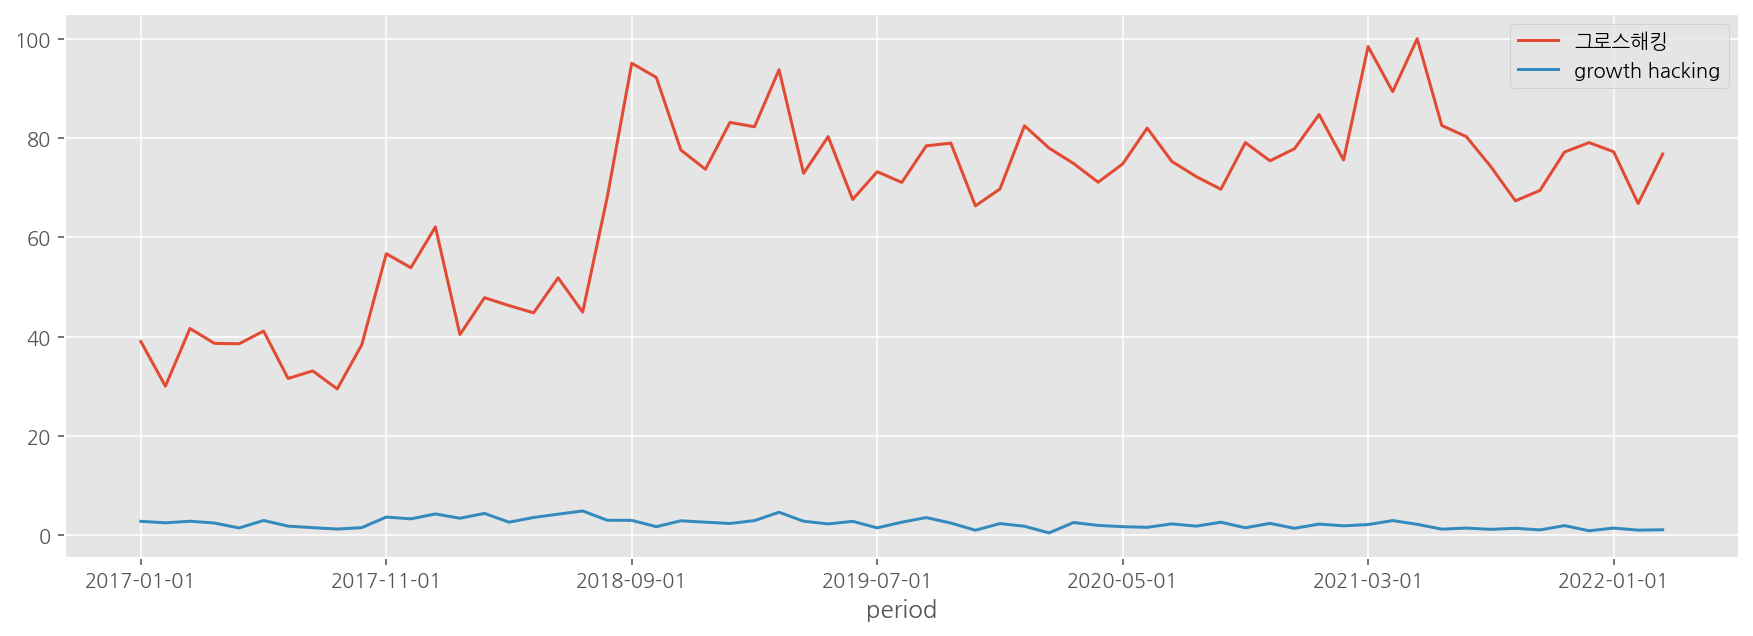

In [22]:
keywords = [["그로스해킹","그로스 해킹", "그로스 해커"], ["growth hacking", "growth hacker"]]

df_main = MyDataLab(keywords, '2017-01-01', '2022-03-31', 'month')
print(df_main.head())
print('\n')


df_main.plot(figsize = (15,5))
plt.show()

- 확실히 네이버에서는 영어 결과는 ratio가 미미함을 볼 수 있다.
 - 영어결과에 대해서는, google trend를 살펴보는 것이 나을 거 같다.
-  2017년부터 트렌드 검색을 한 결과, 2018년 즈음부터 결과가 급격히 성장하는 그림을 볼 수 있다. 이는 그로스 해킹에 대한 관심도가 높아졌다고 볼 수 있다.